In [3]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
%matplotlib inline


2024-08-19 13:55:26.156047: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-19 13:55:26.159595: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-19 13:55:26.170509: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 13:55:26.188785: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-19 13:55:26.194171: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-19 13:55:26.207210: I tensorflow/core/platform/cpu_feature_gu

In [1]:
!wget --no-clobber https://raw.githubusercontent.com/stefannae/SIC-Artificial-Intelligence/main/SIC_AI_Coding_Exercises/SIC_AI_Chapter_09_Coding_Exercises/data_boston.csv


--2024-08-19 13:55:13--  https://raw.githubusercontent.com/stefannae/SIC-Artificial-Intelligence/main/SIC_AI_Coding_Exercises/SIC_AI_Chapter_09_Coding_Exercises/data_boston.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35202 (34K) [text/plain]
Saving to: ‘data_boston.csv’

data_boston.csv     100%[===================>]  34.38K  --.-KB/s    in 0.02s   

2024-08-19 13:55:14 (2.00 MB/s) - ‘data_boston.csv’ saved [35202/35202]



In [4]:
 # Read.
df = pd.read_csv('data_boston.csv', header='infer',encoding = 'latin1')
X = df.drop(columns=['PRICE'])
y = df['PRICE']


In [5]:
 # View.
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
 # Scale the X data.
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)


[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 2.87234043e-01
  1.00000000e+00 8.96799117e-02]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 5.53191489e-01
  1.00000000e+00 2.04470199e-01]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 5.53191489e-01
  9.89737254e-01 6.34657837e-02]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  1.00000000e+00 1.07891832e-01]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  9.91300620e-01 1.31070640e-01]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  1.00000000e+00 1.69701987e-01]]


In [7]:
 # Spit the data into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=123)
n_vars = X_train.shape[1]


In [8]:
# Add layers on a Sequential object.
my_model1 = Sequential()
my_model1.add(Dense(input_dim = n_vars, units = 1, activation="linear")) #Add a output layer for linear regression.


/home/visitor14/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Summary of the model.
my_model1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
 # Hyperparameters.
n_epochs = 2000
batch_size = 10
learn_rate = 0.002


In [11]:
# Define the optimizer and then compile.
my_optimizer=Adam(learning_rate=learn_rate)
my_model1.compile(loss = "mae", optimizer = my_optimizer, metrics=["mse"])


In [12]:
# Train the model.
# verbose = 0 means no output. verbose = 1 to view the epochs.
my_summary = my_model1.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0)


In [13]:
 # View the keys.
my_summary.history.keys()


dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

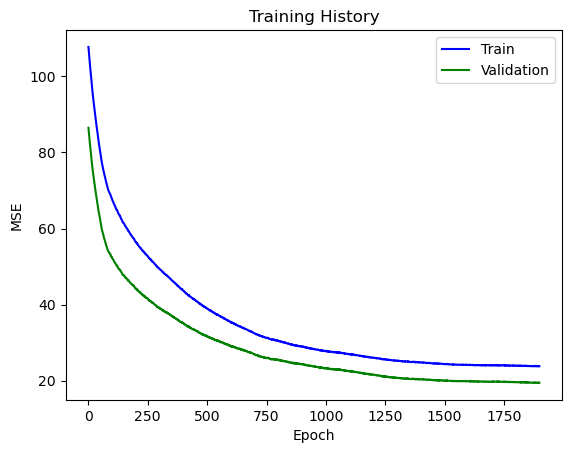

In [14]:
# Visualize the training history.
n_skip = 100 # Skip the first few steps.
plt.plot(my_summary.history['mse'][n_skip:], c="b")
plt.plot(my_summary.history['val_mse'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [15]:
 # Predict and test using a formula.
y_pred = my_model1.predict(X_test)[:,0]
RMSE = np.sqrt(np.mean((y_test-y_pred)**2))
np.round(RMSE,3)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


5.646

In [16]:
 # Use the evaluate() method.
MSE = my_model1.evaluate(X_test, y_test, verbose=0)[1] # Returns the 0 =␣loss value and 1 = metrics value.
RMSE = np.sqrt(MSE)
print("Test RMSE : {}".format(np.round(RMSE,3)))

Test RMSE : 5.646


In [17]:
from keras.models import Model
from keras.layers import Input, Dense


In [18]:
my_input = Input(shape=(n_vars,)) # Input␣layer.
my_output = Dense(units=1,activation='linear')(my_input) # Output␣layer.

In [19]:
my_model2 = Model(inputs=my_input,outputs=my_output) # The model.


In [20]:
 # Summary of the model.
my_model2.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Define the optimizer and then compile.
my_optimizer=Adam(learning_rate=learn_rate)
my_model2.compile(loss = "mae", optimizer = my_optimizer, metrics=['mse'])

In [22]:
my_summary = my_model2.fit(X_train, y_train, epochs = n_epochs, batch_size= batch_size, validation_split = 0.2, verbose = 0)

In [23]:
# 
n_skip = 100

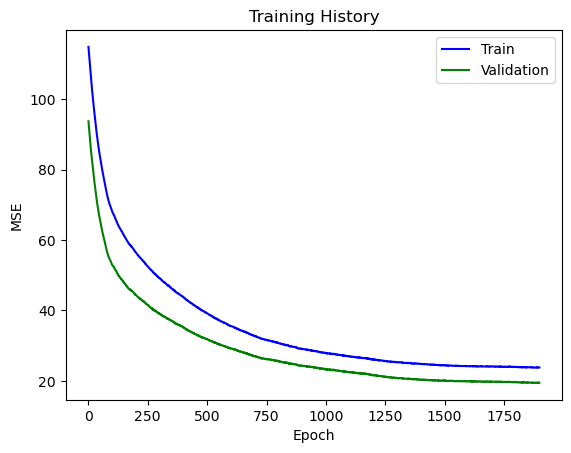

In [24]:
plt.plot(my_summary.history['mse'][n_skip:], c="b")
plt.plot(my_summary.history['val_mse'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [25]:
 # Use the evaluate() method.
MSE = my_model2.evaluate(X_test, y_test, verbose=0)[1] # Returns the 0 = loss value and 1 = metrics value.
RMSE = np.sqrt(MSE)
print("Test RMSE : {}".format(np.round(RMSE,3)))


Test RMSE : 5.642
